<h2>Proyek Analisis Data: Air Quality Dataset</h2>

- Nama: Raihan Widiatama
- Emali: raihan.widiatama@gmail.com
- ID Dicoding: raihan_wtma


<h2>Menentukan Pertanyaan Bisnis</h2>

- Bagaimana tren polutan (PM2.5, PM10, SO2, NO2, CO, dan O3) berubah dari tahun ke tahun?
- Bagaimana perubahan tingkat polutan pada jam-jam tertentu?
- Apakah ada korelasi antar polutan (PM2.5, PM10, SO2, NO2, CO, dan O3)?
- Apakah curah hujan mempengaruhi konsentrasi polutan terutama PM2.5 dan PM10?


<h2>Import Library</h2>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data Wrangling</h2>

<h3>Gathering Data</h3>

In [2]:
# Menentukan path folder file csv
folder_path = "./data/"
# Mengambil file yang berakhiran .csv
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

In [3]:
# Membaca data dari setiap file csv
stations_data = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    dataframe = pd.read_csv(file_path)
    stations_data.append(dataframe)

In [4]:
# Menggabungkan semua dataframe dalam list station_data
station_df = pd.concat(stations_data)
station_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


<h3>Assessing Data</h3>

In [5]:
# Menampilkan informasi ringkas mengenai jumlah kolom, baris, dan tipe data
station_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


Dataset memiliki 420,768 baris data dan 18 kolom, tidak ditemukan adanya tipe data yang salah tetapi terdapat beberapa kolom yang mengindikasikan adanya missing value.

In [6]:
# Menampilkan jumlah missing value dari setiap kolom
station_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [7]:
# Menghitung jumlah duplikasi data dalam dataframe
print("Jumlah duplikasi: ", station_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
# Menampilkan deskripsi statistik dari kolom numerik
station_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


<h3>Cleaning Data</h3>

In [9]:
# Menampilkan baris yang mengandung missing value
station_df[station_df.isnull().any(axis=1)]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
74,75,2013,3,4,2,34.0,62.0,NaN,14.0000,300.0,68.0,8.1,1016.7,-11.8,0.0,N,4.3,Aotizhongxin
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
76,77,2013,3,4,4,7.0,18.0,14.0000,NaN,400.0,42.0,6.0,1018.0,-11.6,0.0,NNW,1.0,Aotizhongxin
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
170,171,2013,3,8,2,339.0,400.0,NaN,162.0000,3899.0,84.0,2.5,998.2,-1.9,0.0,SW,0.8,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong
35029,35030,2017,2,27,13,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1015.8,-5.2,0.0,SSE,1.8,Wanshouxigong
35054,35055,2017,2,28,14,3.0,6.0,NaN,5.0000,NaN,82.0,14.6,1013.3,-15.6,0.0,N,3.6,Wanshouxigong
35055,35056,2017,2,28,15,11.0,21.0,2.0000,5.0000,200.0,NaN,15.4,1013.0,-15.0,0.0,NNW,3.3,Wanshouxigong


In [10]:
# Membuat kolom baru bernama "datetime" berdasarkan kolom year, month, day, dan hour
station_df['datetime'] = pd.to_datetime(station_df[['year', 'month', 'day', 'hour']])
station_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


Terdapat 38600 baris yang memiliki missing value, untuk mengatasi missing value tersebut metode yang akan digunakan adalah interpolation karena dataframe yang digunakan merupakan data dengan rentang waktu.

In [11]:
# Menangani missing value pada kolom "wd" dengan metode forward fill (nilai sebelumnya)
station_df['wd'] = station_df['wd'].ffill()

In [12]:
# Mengurutkan dataframe berdasarkan kolom "datetime"
station_df = station_df.sort_values(by='datetime')

# Menangani missing value dengan metode interpolasi
column_to_fill = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
station_df[column_to_fill] = station_df[column_to_fill].interpolate(method='linear', limit_direction='forward')

Variabel column_to_fill merupakan list kolom yang memiliki missing value yang merupakan data numerik. Karena kolom "wd" merupakan data kategoris, untuk menagani missing value pada kolom ini digunakan metode forward fill atau mengisi data dengan nilai sebelumnya.

In [13]:
# Memeriksa kembali adanya missing value
station_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

<h2>Exploratory Data Analysis (EDA)</h2>

In [14]:
station_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43653,NaN,35064,NaN
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.841974,104.849503,15.885401,50.625164,1232.467191,57.018663,13.531755,1010.754564,2.482894,0.064419,NaN,1.730470,NaN,2015-03-01 11:29:59.999999232
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.266070,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,81.181800,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN,2017-02-28 23:00:00


Insight yang diperoleh:
- Rentang nilai PM2.5 dan PM10 mulai dari 2.0 µg/m³ hingga nilai tertingginya 999 µg/m³ mingindikasikan adanya pencemaran udara pada waktu tertentu. 
- Rata-rata suhu udara (TEMP) adalah 13.5°C, dengan variasi suhu dari -19.9°C hingga 41.6°C. Variasi tersebut mengindikasikan kondisi iklim sangat bervariasi sepanjang periode pengukuran.
- Rata-rata curah hujan adalah 0.06 mm yang mengindikasikan bahwa jarang terjadi hujan sepanjang periode pengukuran.
- Kecepatan angin (WSPM) rata-rata adallah 1.73 m/s, dengan kecepatan angin maksimum mencapai 13.2 m/s.
- Standard deviation yang cukup besar pada parameter CO (1162.2), PM2.5(81.0), dan PM10 (92.5) menunjukan adanya variasi data yang signifikan.

In [15]:
# Membuat list polutan yang akan dianalisis
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

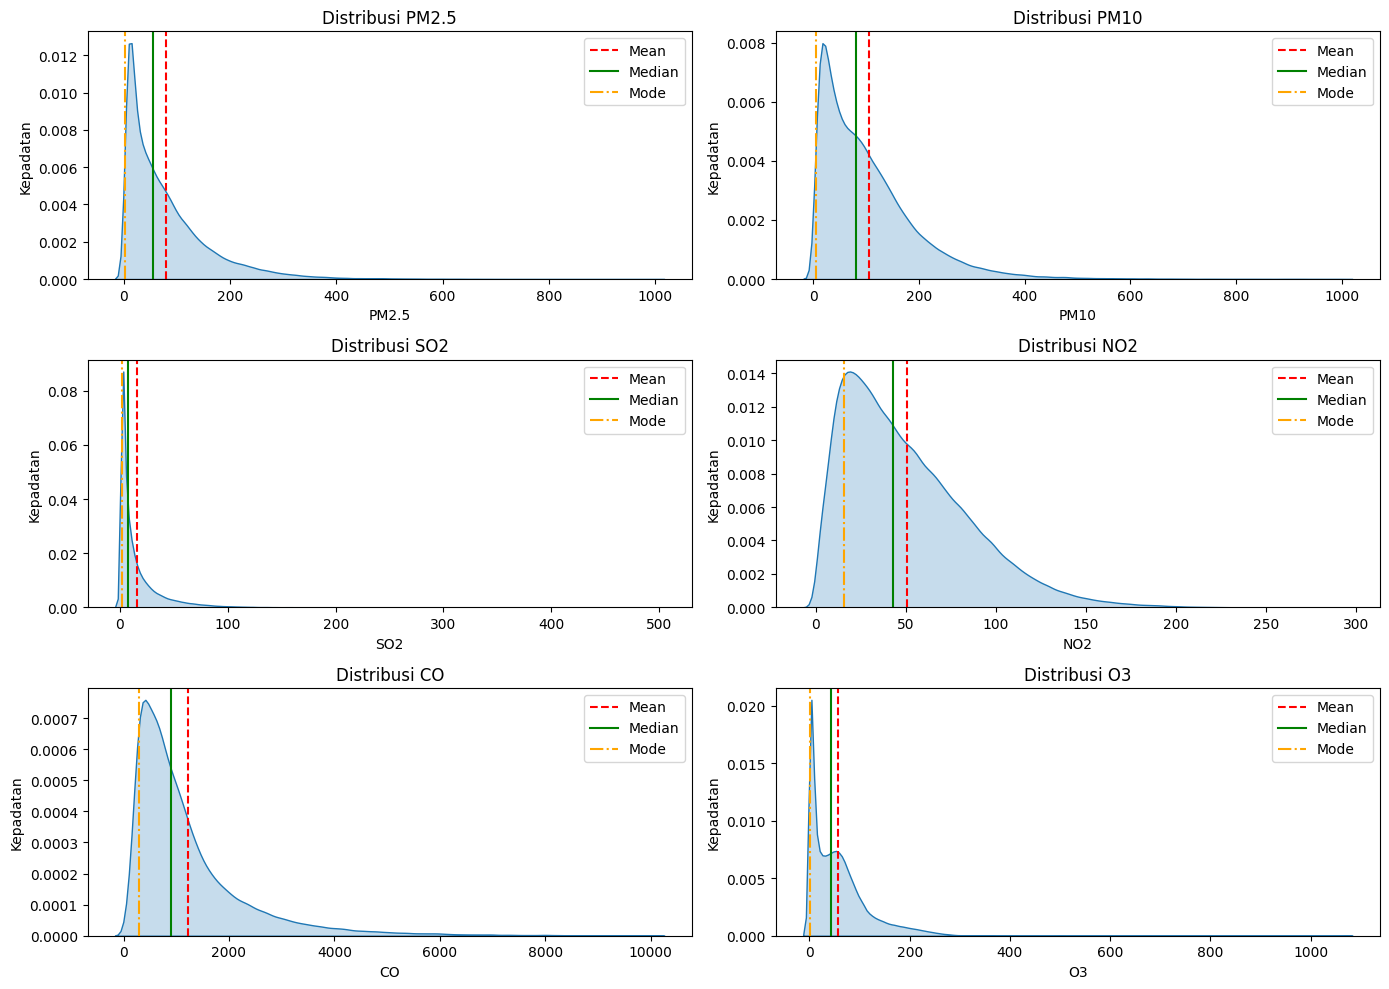

In [20]:
# Memvisualisasikan distribusi data polutan
plt.figure(figsize=(14, 10))
for i, pollutant in enumerate(pollutants):
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(station_df[pollutant], fill=True)

    # Menghitung statistik
    mean_val = station_df[pollutant].mean()
    median_val = station_df[pollutant].median()
    mode_val = station_df[pollutant].mode()[0]
    
    # Menambahkan garis vertikal untuk mean, median, dan mode
    plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
    plt.axvline(median_val, color='green', linestyle='-', label='Median')
    plt.axvline(mode_val, color='orange', linestyle='-.', label='Mode')
    
    plt.title(f'Distribusi {pollutant}')
    plt.xlabel(f'{pollutant}')
    plt.ylabel('Kepadatan')
    plt.legend()

plt.tight_layout()
plt.show()

Plot di atas menunjukan polutan PM2.5, PM10, SO2, NO2, CO, O3 cenderung memiliki grafik yang lebih tinggi disebelah kiri dan mengekor rendah disebelah kanan, ini menunjukan bahwa polutan memiliki distribusi right skewed. Polutan PM2.5, PM10, NO2, CO, dan O3 memiliki distribusi di mana sebagian besar nilai berkumpul di sisi kiri (lebih rendah) dan ada beberapa outliers di sisi kanan yang menyebabkan mean lebih tinggi daripada median. Polutan SO2 memiliki distribusi dengan outliers yang lebih berat atau nilai yang lebih besar di sisi kanan.

In [21]:
# Mengelompokan data berdasarkan stasiun
station_df.groupby('station').agg({
    'TEMP': ['mean'],
    'PRES': ['mean'],
    'DEWP': ['mean'],
    'RAIN': ['mean'],
    'WSPM': ['mean'],
})

,TEMP,PRES,DEWP,RAIN,WSPM
,mean,mean,mean,mean,mean
station,,,,,
Aotizhongxin,13.581262,1011.850841,3.120253,0.067383,1.708990
Changping,13.671538,1007.777184,1.489093,0.060290,1.854880
Dingling,13.671489,1007.777313,1.488935,0.060301,1.854844
Dongsi,13.668174,1012.551042,2.445051,0.063983,1.861217
Guanyuan,13.581310,1011.850660,3.120253,0.067383,1.708988
Gucheng,13.855419,1008.840744,2.600326,0.064375,1.344883
Huairou,12.432546,1007.617910,2.219708,0.067833,1.653417
Nongzhanguan,13.668132,1012.551032,2.445092,0.063983,1.861166


- Suhu rata-rata antar stasiun berkisar antara 12.4°C hingga 13.8°C.
- Stasiun Wanliu menunjukan kelembapan rata-rata lebih tinggi dibandingkan stasiun lainnya, sementara stasiun Changping dan Dingling lebih kering dibandinkan stasiun yang lain.

<h3>Pertanyaan 1: Bagaimana tren polutan (PM2.5, PM10, SO2, NO2, CO, dan O3) berubah dari tahun ke tahun?</h3>

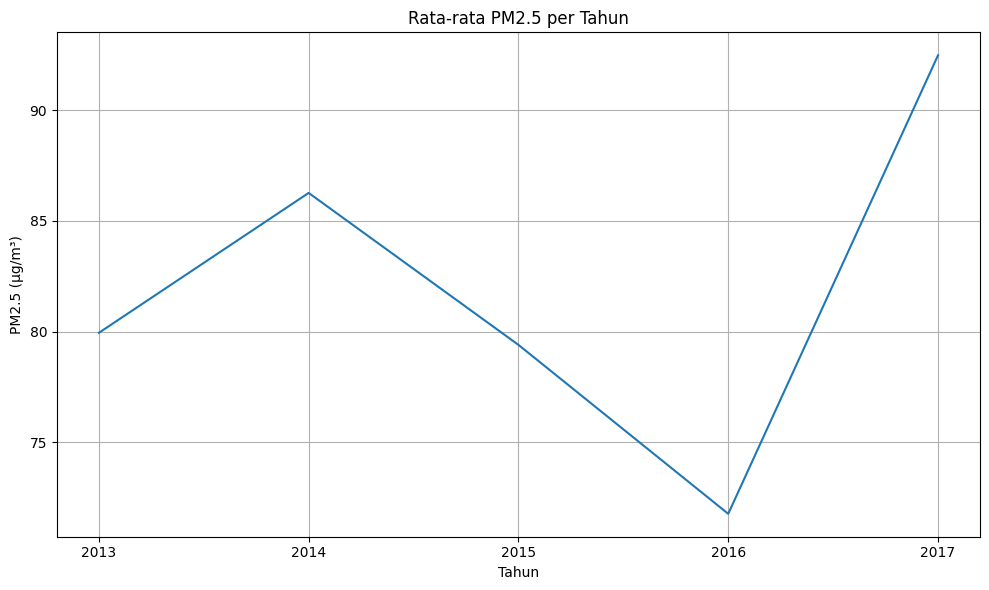

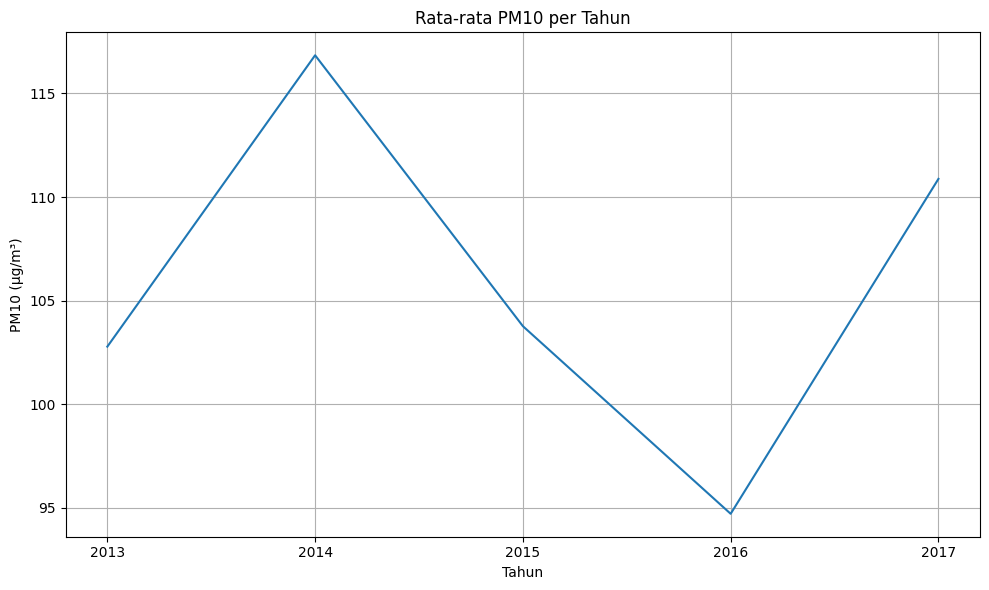

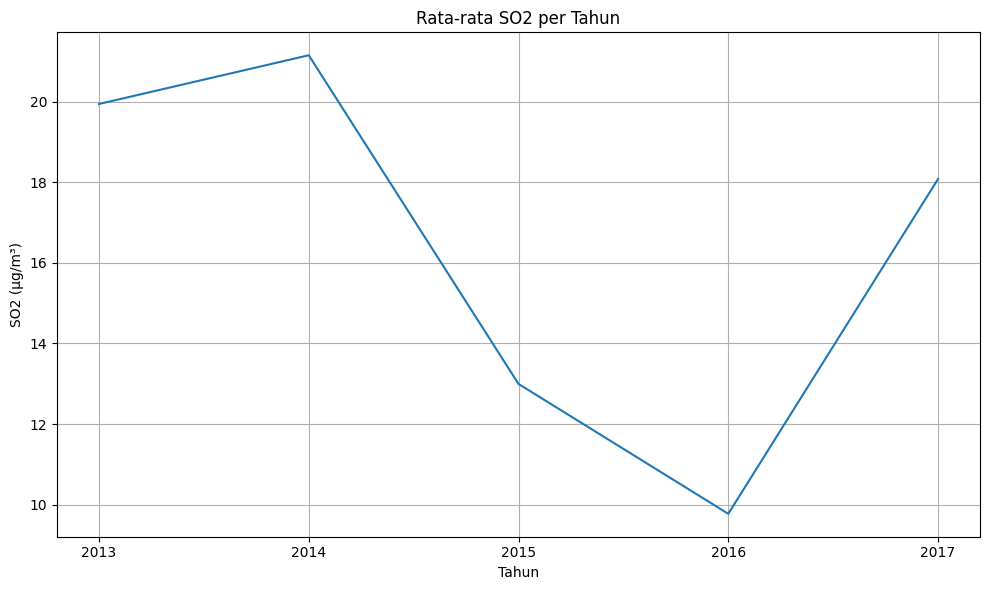

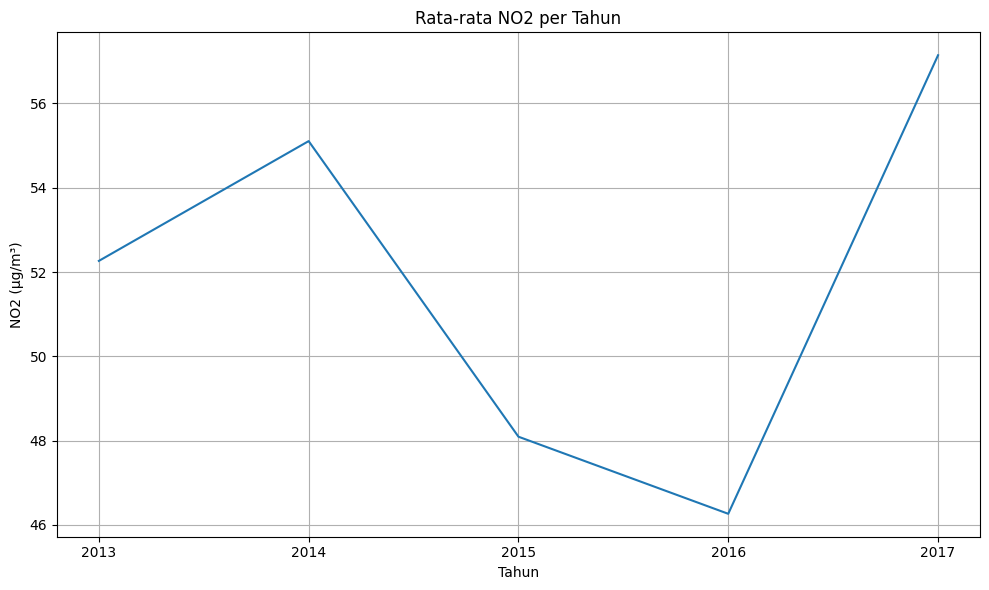

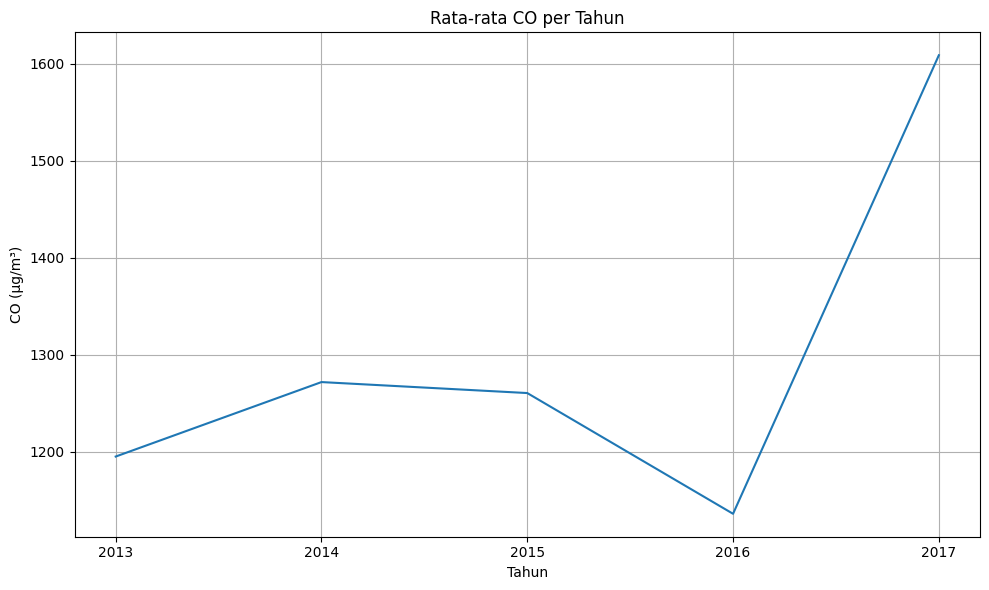

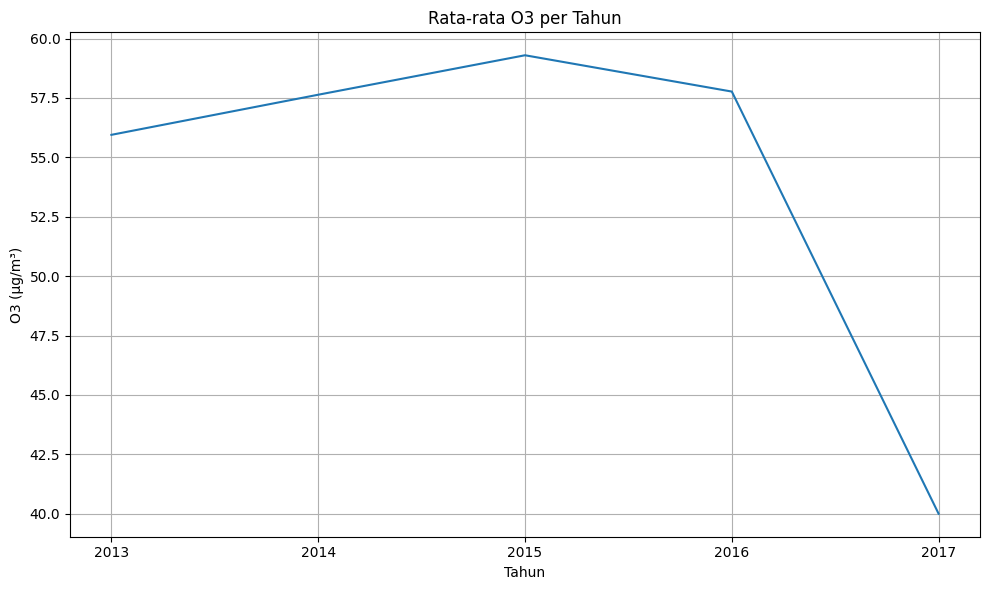

In [24]:
# Menghitung nilai rata-rata untuk kolom pada list polutan dan mengelompokkanya berdasarkan tahun
groupByYear = station_df.groupby('year')[pollutants].mean().reset_index()

# Membuat grafik lineplot untuk setiap polutan
for pollutant in pollutants:
    plt.figure(figsize=(10,6))
    sns.lineplot(x='year', y=pollutant, data=groupByYear)
    plt.title(f'Rata-rata {pollutant} per Tahun')
    plt.xlabel('Tahun')
    plt.ylabel(f'{pollutant} (µg/m³)')

    plt.xticks(ticks=groupByYear['year'], labels=groupByYear['year'].astype(int))

    plt.grid(True)
    plt.tight_layout()
    
plt.show()

- PM2.5 dan PM10 mengalami peningkatan dari tahun 2013 hingga 2014, namun sempat mengalami penurunan dari tahun 2014 hinnga 2016. Pada tahun 2017 konsentasi polutan mengalami peningkatan yang cukup signifikan.
- SO2 dan NO2 menunjukkan tren yang lebih fluktuatif, dengan sedikit peningkatan pada tahun 2014 kemudian mengalami penurunan secara bertahap hingga 2016. Tetapi terjadi peningkatan pada tahun 2017.
- CO menunjukkan fluktuasi dengan sedikit penurunan pada tahun 2016, namun terjadi kenaikan signifikan pada 2017.
- O3 mengalami peningkatan secara bertahap dari tahun 2013 hingga 2015, namun mengalami penurunan signifikan pada tahun 2017.


In [25]:
# Mengempokan data berdasarkan stasiun dan tahun
station_df.groupby(by=['station', 'year']).agg({
    'PM2.5': ['mean'],
    'PM10': ['mean'],
    'SO2': ['mean'],
    'NO2': ['mean'],
    'CO': ['mean'],
    'O3': ['mean'],
})

PM2.5        PM10        SO2        NO2           CO  \
                          mean        mean       mean       mean         mean   
station       year                                                              
Aotizhongxin  2013   82.412786  112.940064  23.598969  63.310191  1167.192077   
              2014   90.649887  122.100926  21.867883  63.919926  1223.396729   
              2015   81.768172  111.978950  14.337896  60.771935  1421.093164   
              2016   73.529261   94.317321  10.828894  48.419681  1189.812446   
              2017   94.282773  107.051116  20.772712  66.083908  1672.936699   
Changping     2013   72.571351   91.156250  19.204006  41.215879  1067.617228   
              2014   80.518273  107.363369  21.156926  46.036617  1207.215447   
              2015   70.722084   95.195625  11.730111  42.699750  1167.859221   
              2016   61.703241   86.603389   8.170573  45.479414  1127.862000   
              2017   79.752317   94.097390  16.392135  50.886038  1529.800902   
Dingling      2013   64.937296   78.658610  14.034768  30.284986   913.467636   
              2014   75.510414   92.192079  15.145374  28.404523   902.968064   
              2015   64.531992   85.607185  11.337929  27.110166   969.272356   
              2016   60.097618   80.862440   7.232930  25.818613   879.991971   
              2017   68.382151   78.742690  13.280573  34.399055  1160.982544   
Dongsi        2013   87.088984  104.814906  23.659703  57.346918  1283.366910   
              2014   88.178495  117.737050  24.199449  57.164190  1383.295478   
              2015   87.168167  112.183976  15.186434  50.318827  1336.813294   
              2016   79.503683  102.325901  11.391054  50.431559  1226.863137   
              2017  102.635760  131.479794  20.366859  57.870927  1622.835607   
Guanyuan      2013   81.566993  107.578250  21.819514  57.945516  1184.980054   
              2014   88.440979  116.254425  23.144299  64.058683  1358.349787   
              2015   82.201033  106.356137  14.070843  54.757277  1312.565834   
              2016   77.054628  104.862326  11.471548  53.387594  1168.938458   
              2017   96.080345  116.153173  21.226178  64.898591  1482.299101   
Gucheng       2013   82.102635  112.515931  17.584380  61.458544  1286.997000   
              2014   90.434831  134.581016  20.156169  62.311728  1433.891348   
              2015   83.512044  116.138186  13.320084  49.658255  1322.385993   
              2016   77.378058  110.799395  10.201141  49.835518  1170.012386   
              2017  100.879710  126.476537  20.536980  62.185381  1795.109970   
Huairou       2013   68.929897   95.664738  17.335180  36.915939   998.372165   
              2014   77.753034  100.699840  17.745027  38.006303  1080.484849   
              2015   70.416393   90.069345   8.719361  28.662215  1041.073674   
              2016   60.987563   82.442020   6.661282  28.248717   931.859544   
              2017   74.035294   91.936349   9.816671  39.043073  1321.595411   
Nongzhanguan  2013   84.355937  103.712350  23.239517  59.554506  1291.942705   
              2014   91.305716  126.460989  24.692927  62.115777  1347.619154   
              2015   84.804343  107.094095  15.781781  58.136137  1378.510414   
              2016   76.010349   97.008018  11.540303  52.340873  1209.158261   
              2017  101.008643  119.762015  20.571877  58.231800  1716.889506   
Shunyi        2013   76.594340   94.510893  15.196065  41.626796  1183.351157   
              2014   84.918571  111.741900  17.877587  46.517715  1183.197776   
              2015   81.194137  100.122472  10.489306  43.272812  1187.576279   
              2016   71.578201   88.031797   9.613919  42.939083  1076.210734   
              2017   95.024301  106.718341  21.125096  55.437664  1770.075272   
Tiantan       2013   83.250045  108.283247  18.204199  53.230827  1306.322610   
              2014   86.859948  115.044252  19.999429  5

<h3>Pertanyaan 2: Bagaimana perubahan tingkat polutan pada jam-jam tertentu?</h3>

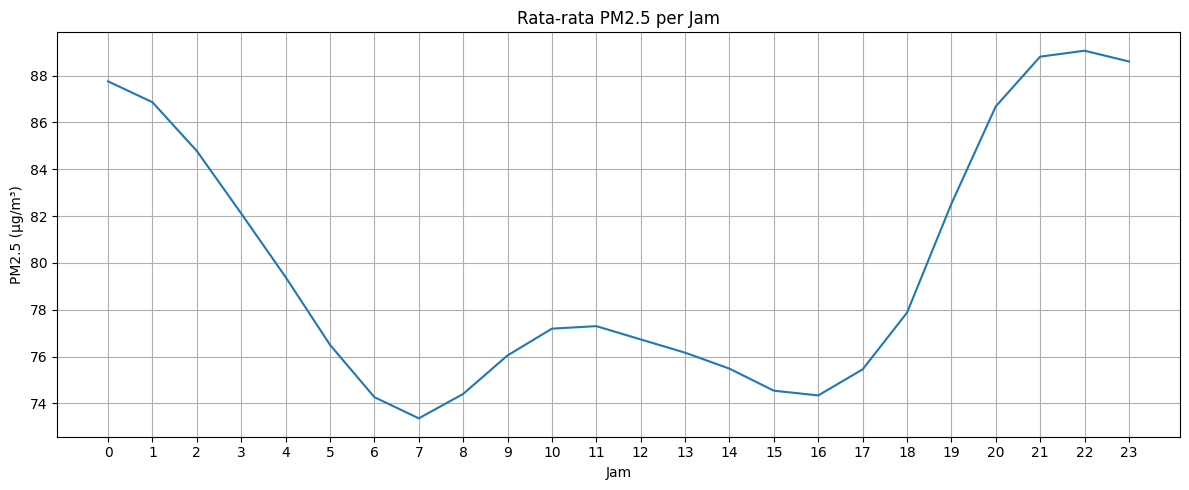

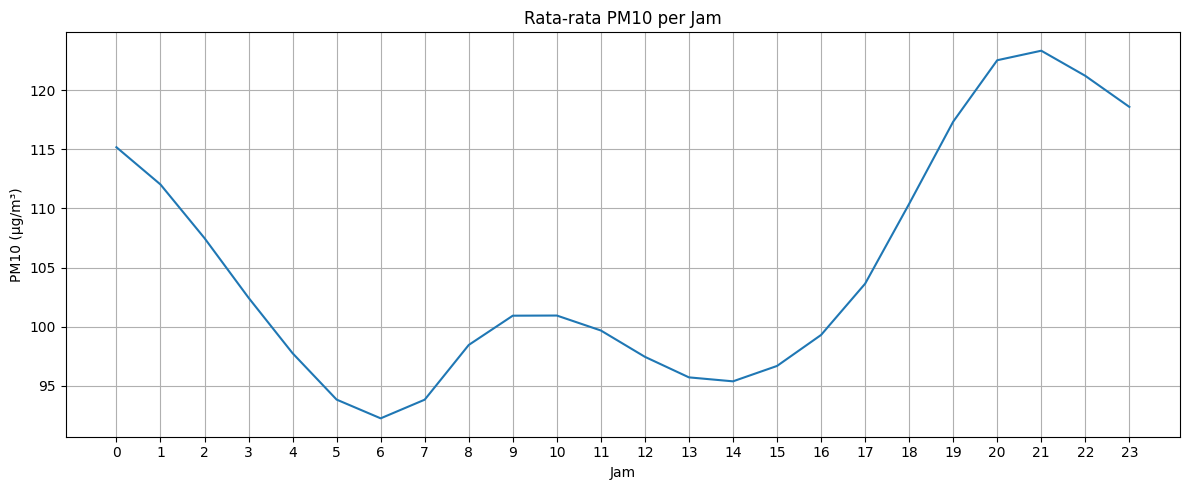

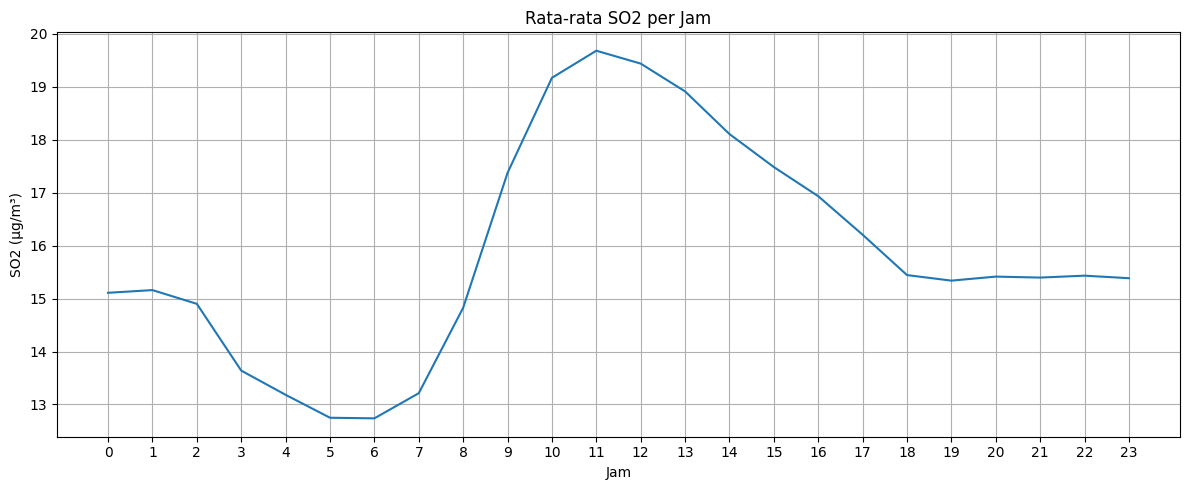

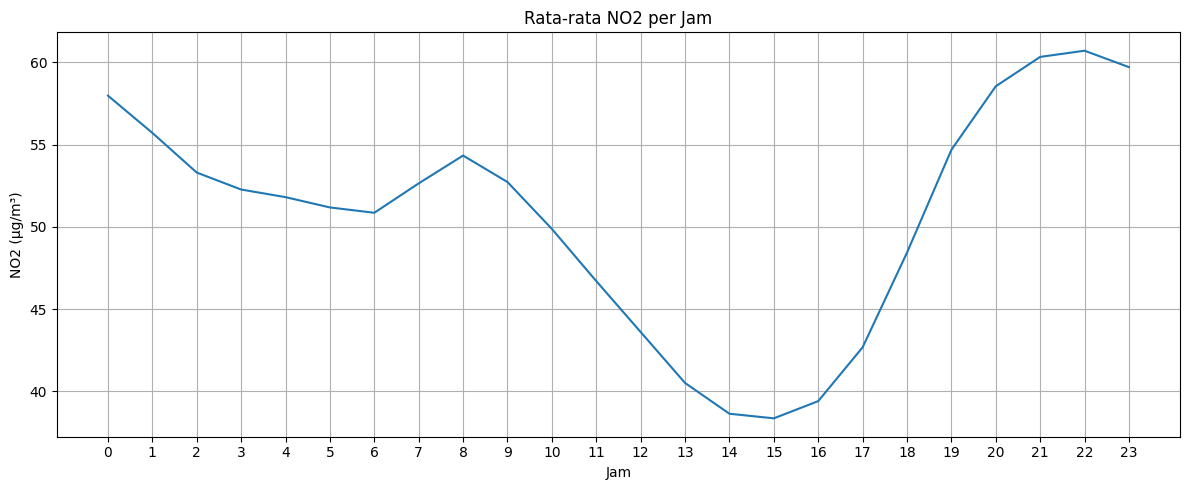

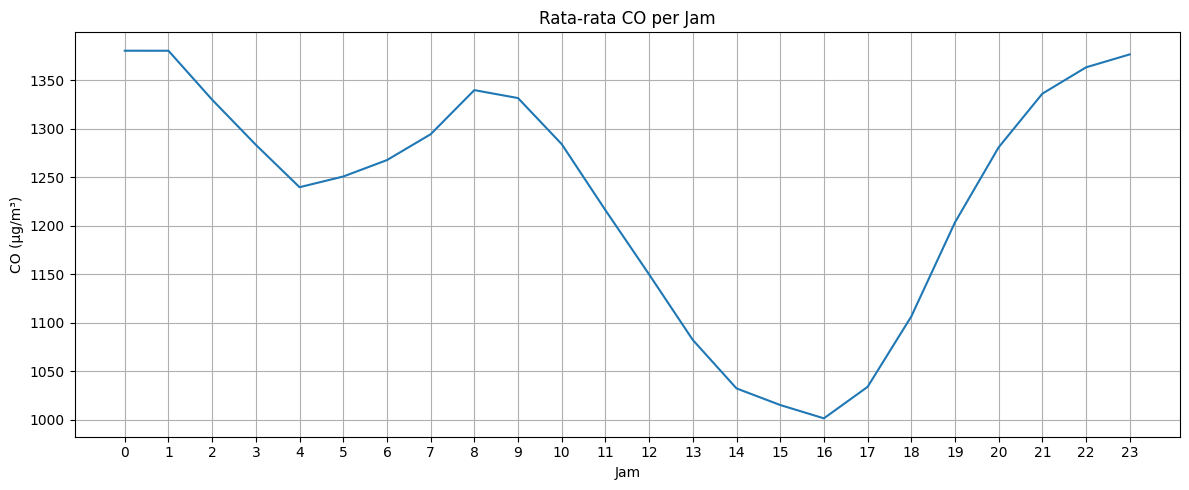

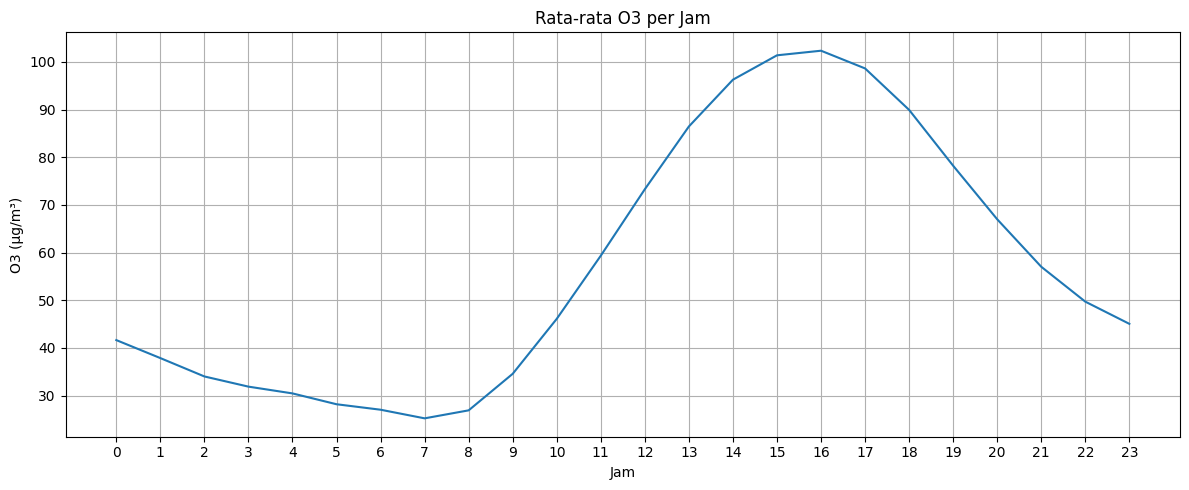

In [29]:
# Menghitung nilai rata-rata untuk kolom pada list polutan dan mengelompokkanya berdasarkan jam
groupByHour = station_df.groupby('hour')[pollutants].mean().reset_index()

# Membuat grafik lineplot untuk setiap polutan
for pollutant in pollutants:
    plt.figure(figsize=(12,5))
    sns.lineplot(x='hour', y=pollutant, data=groupByHour)
    plt.title(f'Rata-rata {pollutant} per Jam')
    plt.xlabel('Jam')
    plt.ylabel(f'{pollutant} (µg/m³)')
    plt.xticks(range(24))

    plt.grid(True)
    plt.tight_layout()

plt.show()

- PM2.5 dan PM10 menunjukkan penurunan yang signifikan selama malam hingga pagi hari (dari pukul 00:00 hingga sekitar pukul 6:00). Namun, setelah pukul 6:00 nilai keduanya mulai meningkat mencapai puncaknya pada malam hari (sekitar pukul 20:00–23:00).
- SO2 mengalami penurunan selama malam dan pagi hari (dari pukul 00:00 hingga sekitar pukul 6:00). Namun, setelah pukul 6:00 konsentrasinya menignkat hingga puncaknya pada pukul 11:00 dan mulai menurun pada pukul 12:00 hingga 18:00.
- NO2 menunjukan kosentrasi tinggi pada jam-jam awal pagi (pukul 00:00–6:00), mengalami sedikit peningkatan pada jam 08:00 dan turun sepanjang siang. Konsentrasi NO2 mengalami peningkatan pada sore hingga malam hari (puncaknya pada pukul 22:00).
- CO menunjukan kosentrasi tinggi menjelang pagi (pukul 01:00–4:00), mengalami sedikit peningkatan pada pagi hari (pukul 05:00 hingga 08:00) dan turun sepanjang siang (pukul09:00 hingga 16:00). Konsentrasi CO kembali mengalami peningkatan pada sore hingga malam hari(16:00 hingga 23:00).
- Konsentrasi O3 mengalami peningkatan pada pagi hingga sore hari (puncaknya sekitar pukul 15:00–16:00) kemudian penurunan hingga malam hari..


<h3>Pertanyaan 3: Apakah ada korelasi antar polutan (PM2.5, PM10, SO2, NO2, CO, dan O3)?</h3>

In [30]:
# Menghitung matriks korelasi untuk kolom-kolom dalam list polutan
correlation_matrix = station_df[pollutants].corr()
print(correlation_matrix)

          PM2.5      PM10       SO2       NO2        CO        O3
PM2.5  1.000000  0.880782  0.485152  0.667313  0.789856 -0.150952
PM10   0.880782  1.000000  0.463850  0.646869  0.698359 -0.112211
SO2    0.485152  0.463850  1.000000  0.501958  0.536022 -0.168150
NO2    0.667313  0.646869  0.501958  1.000000  0.701142 -0.471091
CO     0.789856  0.698359  0.536022  0.701142  1.000000 -0.311586
O3    -0.150952 -0.112211 -0.168150 -0.471091 -0.311586  1.000000


Untuk mempermudah analisis matrik korelasi divisualisasikan menggunakan heat map

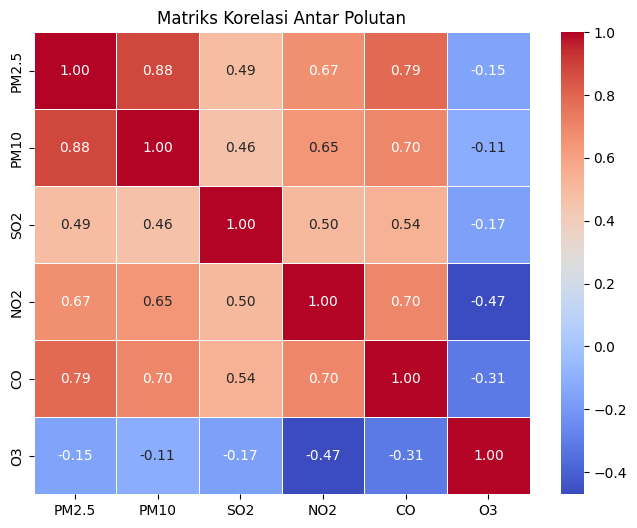

In [31]:
# Menampilkan matriks korelasi dalam bentuk heat map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Polutan')
plt.show()

- PM2.5 dan PM10 menunjukan korelasi yang sangat kuat (0.88), hal ini mengindikasikan bahwa PM2.5 dan PM10 cenderung meningkat dan menurun bersamaan
- PM2.5 dan CO menunjukan korelasi positif yang tinggi (0.79), hal ini mengindikasikan bahwa konsentrasi PM2.5 dan CO sering berfluktuasi bersamaan
- PM2.5 dan NO2 menunjukan korelasi positif yang cukup tinggi (0.67), hal ini mengindikasikan bahwa PM2.5 dan NO2 ering berfluktuasi bersamaan
- PM10 dan SO2 memiliki korelasi sebesar 0.46, menunjukan bahwa kedua polutan ini seing berhubungan.
- PM10 dan CO menunjukan korelasi positif yang tinggi (0.70), hal ini mengindikasikan bahwa konsentrasi PM10 dan CO sering berfluktuasi bersamaan
- PM10 dan NO2 menunjukan korelasi yang cukup tinggi (0.65), hal ini mengindikasikan bahwa konsentrasi PM10 dan CO sering berfluktuasi bersamaan
- O3 memiliki korelasi negatif pada sebagian besar polutan, hal ini menunjukan meskipun terdapat korelasi dengan polutan sebagian besar O3 tidak terpengaruh langsung oleh polutan lain

<h3>Pertanyaan 4: Apakah curah hujan mempengaruhi konsentrasi polutan terutama PM2.5 dan PM10?</h3>

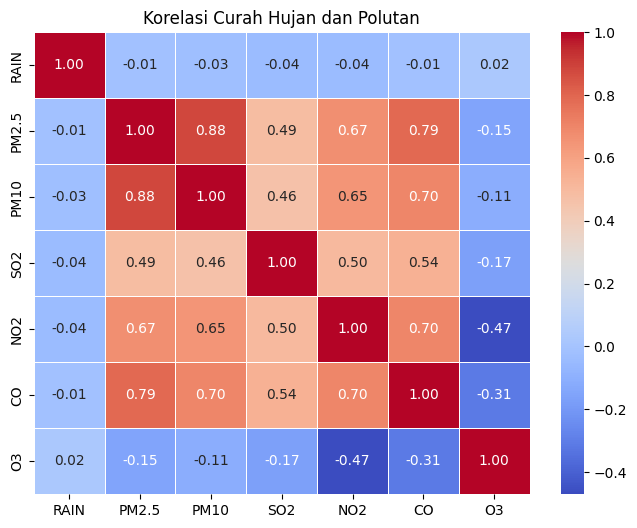

In [32]:
# Menghitung matriks korelasi untuk kolom-kolom dalam list polutan + kolom "rain"
rain_pollutant_matrix = station_df[['RAIN'] + pollutants].corr()

# Menampilkan matriks korelasi dalam bentuk heat map
plt.figure(figsize=(8, 6))
sns.heatmap(rain_pollutant_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Curah Hujan dan Polutan')
plt.show()

Secara umum korelasi antara curah hujan (RAIN) dan polutan sangat lemah (mendekati 0), hal ini menunjukan bahwa hujan tidak memiliki pengaruh signifikan terhadap konsentrasi sebagian besar polutan. Scatter plot mungkin tidak perlu dilakukan untuk melihat hubungan langsung antara curah hujan dan konsentrasi polutan terutama PM2.5 dan PM10.

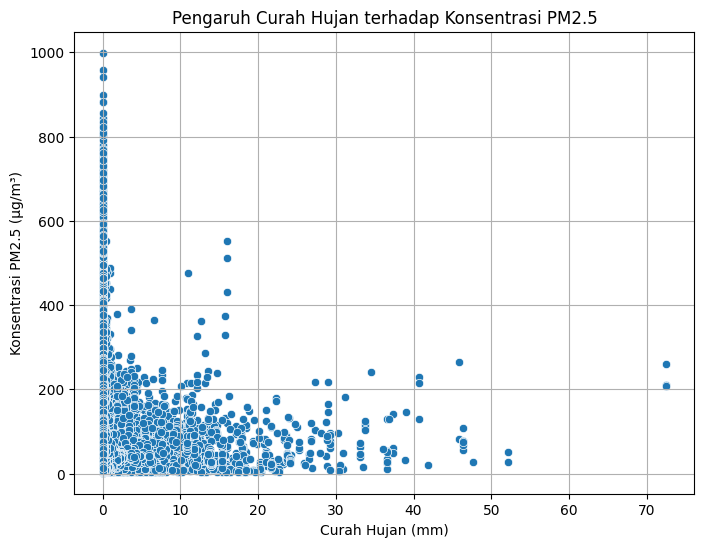

In [33]:
# Membuat visualisasi scatter plot untuk menggambarkan hubungan antara curah hujan (rain) dan PM2.5
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RAIN', y='PM2.5', data=station_df)
plt.title('Pengaruh Curah Hujan terhadap Konsentrasi PM2.5')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

Secara umum ketika curah hujan rendah atau nol konsentrasi PM2.5 tinggi, dan ketika curah hujan meninggkat konsentrasi PM2.5 cenderung menurun.

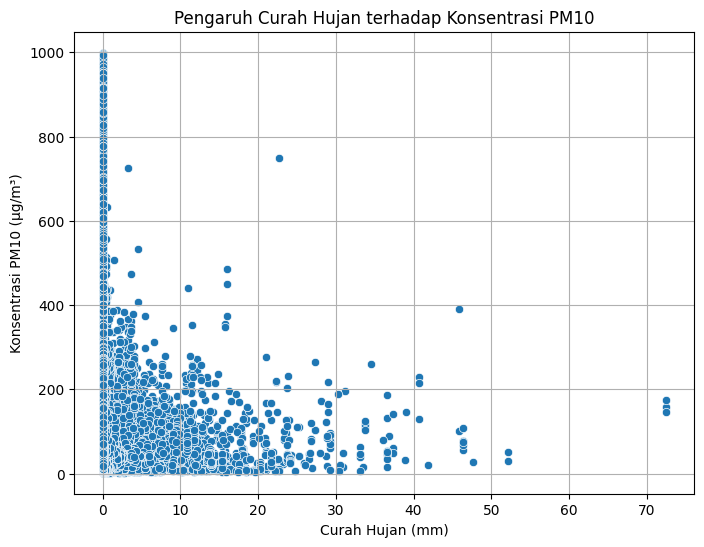

In [34]:
# Membuat visualisasi scatter plot untuk menggambarkan hubungan antara curah hujan (rain) dan PM10
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RAIN', y='PM10', data=station_df)
plt.title('Pengaruh Curah Hujan terhadap Konsentrasi PM10')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Konsentrasi PM10 (µg/m³)')
plt.grid(True)
plt.show()

Secara umum ketika curah hujan rendah atau nol konsentrasi PM10 tinggi dan ketika curah hujan meninggkat konsentrasi PM10 cenderung menurun, meskipun terdapat anomali konsentrasi PM10 tinggi pada saat curah hujan sedang.

<h2>Conclusion</h2>

- Pertanyaan 1: Bagaimana tren polutan (PM2.5, PM10, SO2, NO2, CO, dan O3) berubah dari tahun ke tahun?
  >  Ada tren penurunan yang signifikan dalam polutan PM2.5, PM10, SO2, NO2 dari tahun 2014 hingga 2016. Namun terjadi peningkatan yang signifikan pada tahun 2017, sebaliknya konsentrasi O3 mencapai titik tertinggi pada 2015 dan kemudian mengalami penurunan yang signifikan pada 2017.
- Pertanyaan 2: Bagaimana perubahan tingkat polutan pada jam-jam tertentu?
  > Ada tren penurunan yang signifikan pada polutan PM2.5 dan PM10 pada malam hingga pagi hari dan sedikit fluktuasi pada siang hari, peningkatan konsentrasi polutan PM2.5 dan PM10 terjadi pada sore hingga puncaknya terjadi pada sekitar pukul 20:00–23:00.
  
  > SO2 mengalami penurunan pada malam hingga pagi hari (dari pukul 00:00 hingga sekitar pukul 6:00), dan mulai meningkat hingga mencapai puncaknya pada pukul 11:00 dan kemudian menurun kembali antara pukul 12:00 hingga 18:00.
  
  > NO2 dan CO mengalami penurunan pada pagi hingga sore hari (sekitar pukul 08:00 hingga 16:00) dan mengalami peningkatan signifikan hingga malam hari
  > (puncaknya pukul 22:00 hingga 23:00).
  
  > O3 memiliki tren peningkatan pada pagi hingga sore hari (puncaknya sekitar pukul 15:00–16:00) kemudian penurunan hingga malam hari.
- Pertanyaan 3: Apakah ada korelasi antar polutan (PM2.5, PM10, SO2, NO2, CO, dan O3)?
  > Secara umum, polutan PM2.5 dan PM10 cenderung memiliki hubungan yang sangat erat dengan polutan lain seperti CO dan NO2, sementara O3 menunjukkan pola yang lebih independen, dengan sedikit atau tanpa pengaruh langsung dari polutan lainnya.
- Pertanyaan 4: Apakah curah hujan mempengaruhi konsentrasi polutan terutama PM2.5 dan PM10?
  > Secara umum, korelasi antara curah hujan (RAIN) dan konsentrasi polutan terutama PM2.5 dan PM10 sangat lemah. Menunjukkan bahwa hujan tidak memiliki pengaruh signifikan terhadap konsentrasi polutan, namun ada kecenderungan bahwa ketika curah hujan rendah konsentrasi PM2.5 dan PM10 cenderung tinggi dan ketika curah hujan meningkat konsentrasi kedua polutan tersebut cenderung menurun. 

In [35]:
station_df.to_csv("main_data.csv", index=False)